In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/wine_reviews/winemag-data_first150k.csv', index_col=0)
df['country'] = df['country'].fillna('')
df['province'] = df['province'].fillna('')
df = df.dropna(subset = ['price'])

                                             |          | [  0%]   00:00 -> (? left)


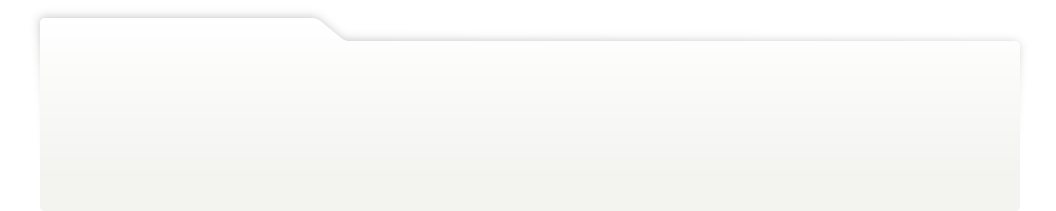
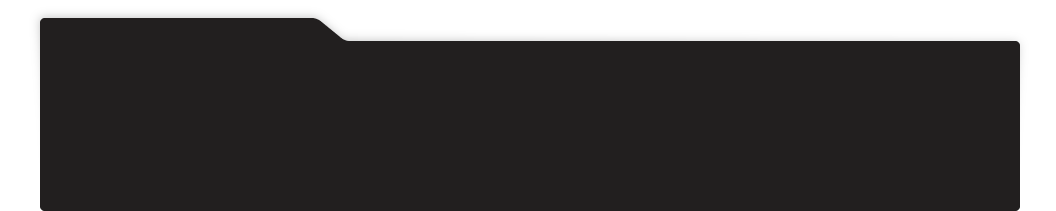
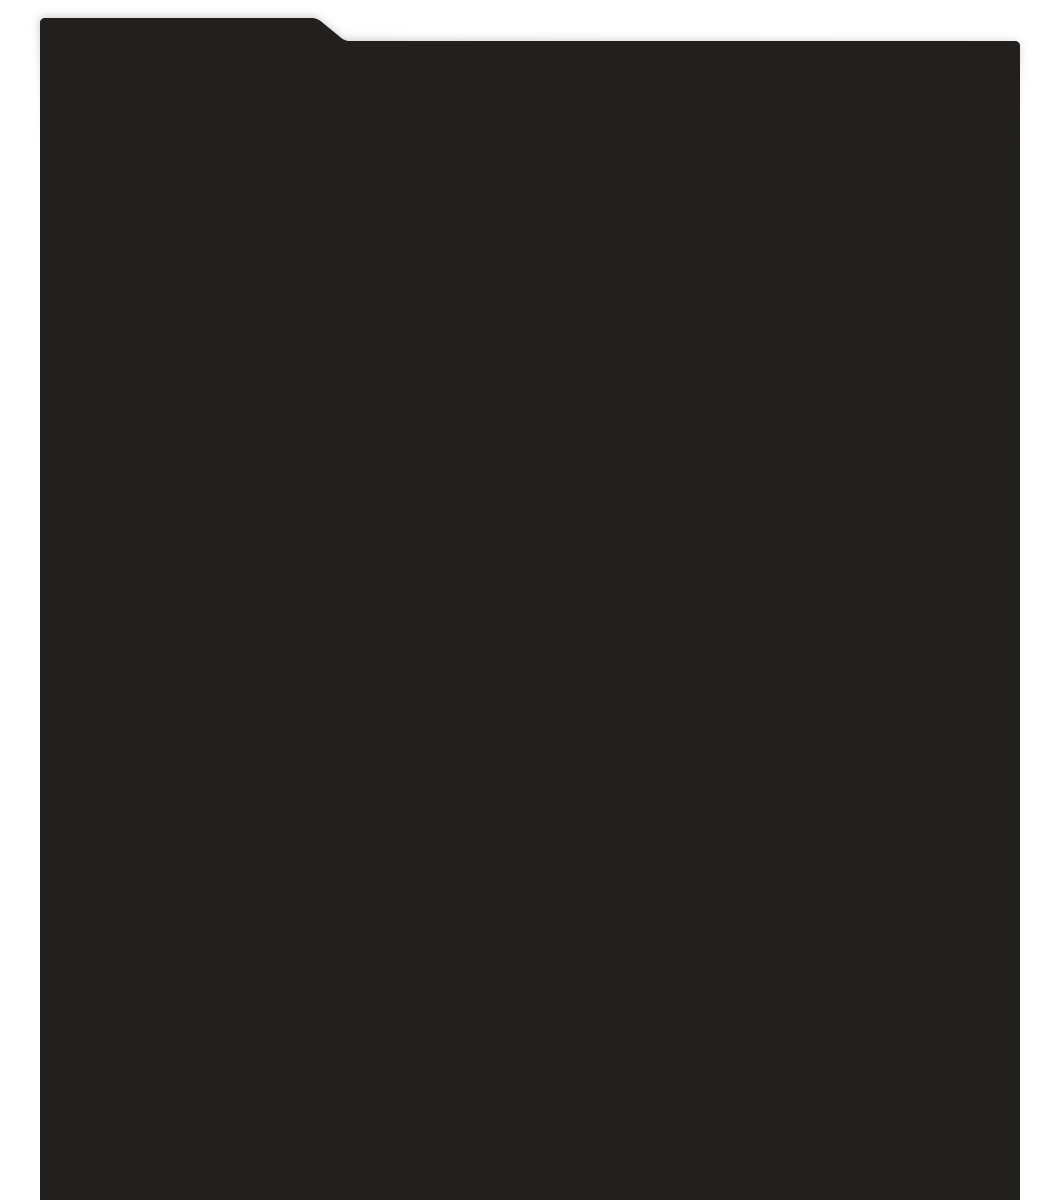
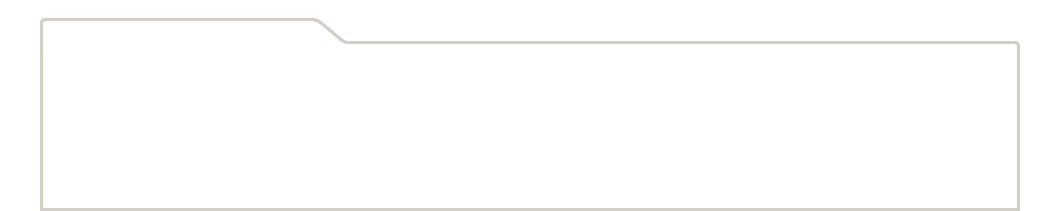
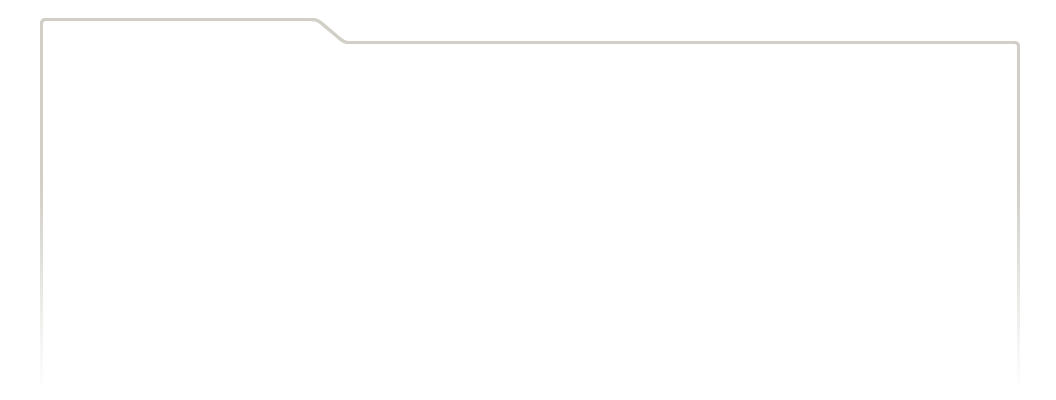
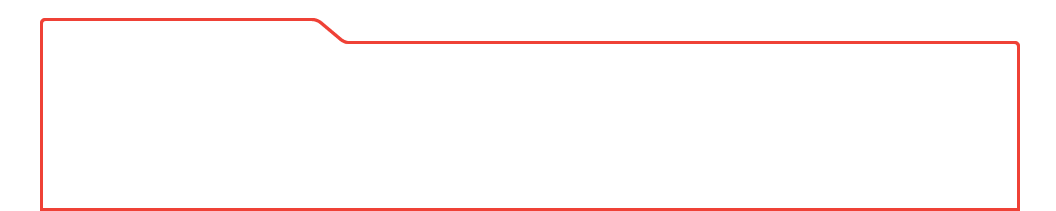
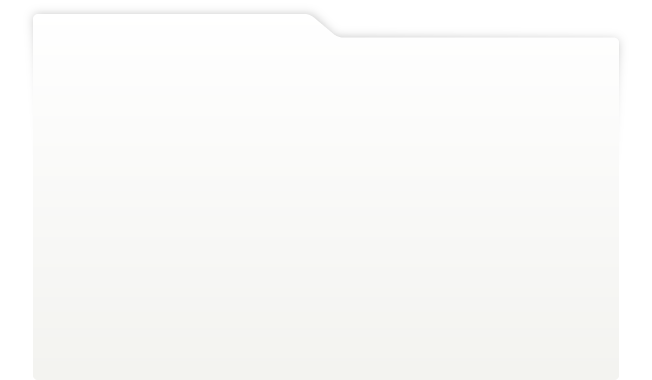
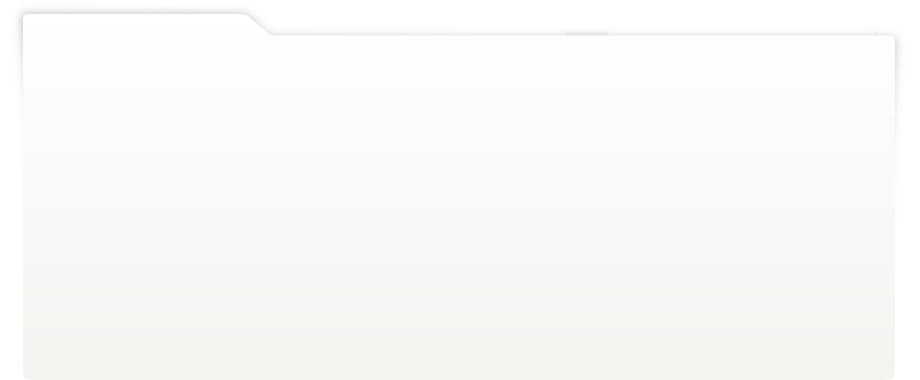
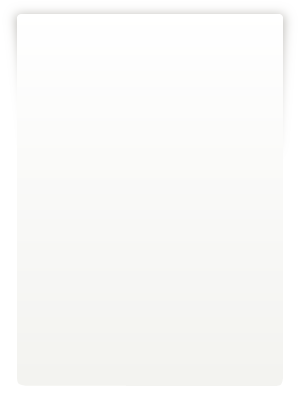
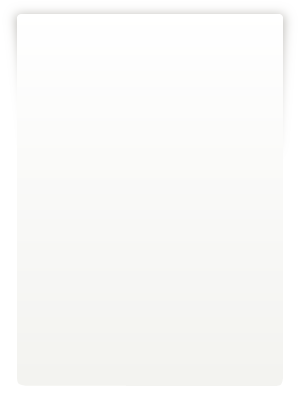
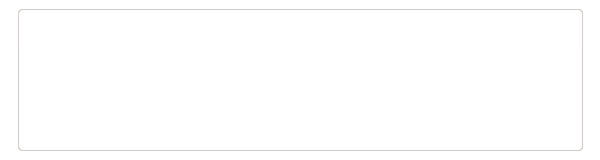
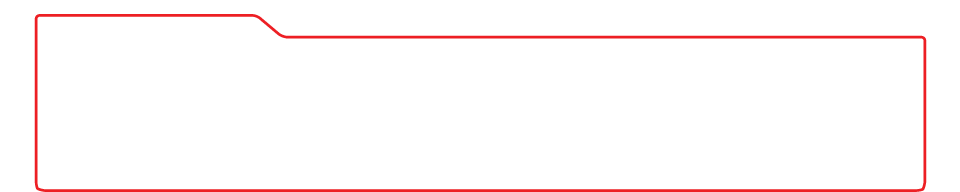
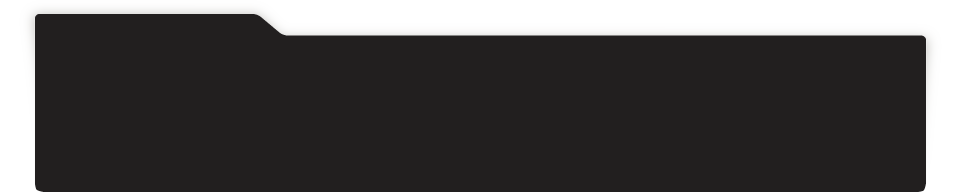
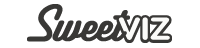
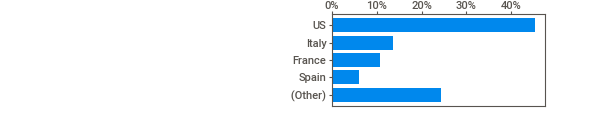
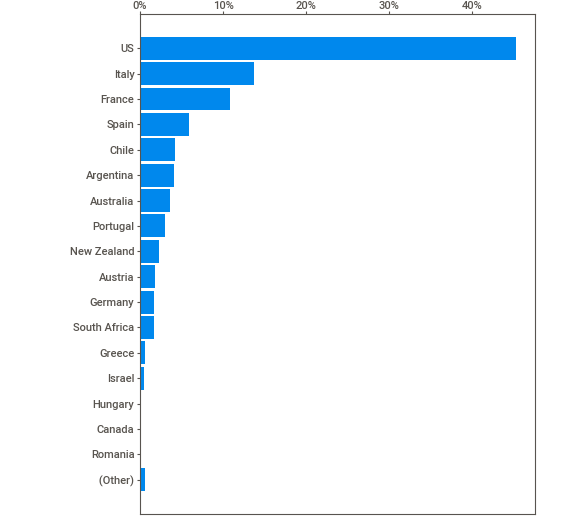
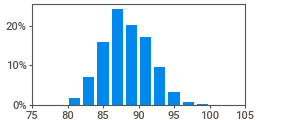
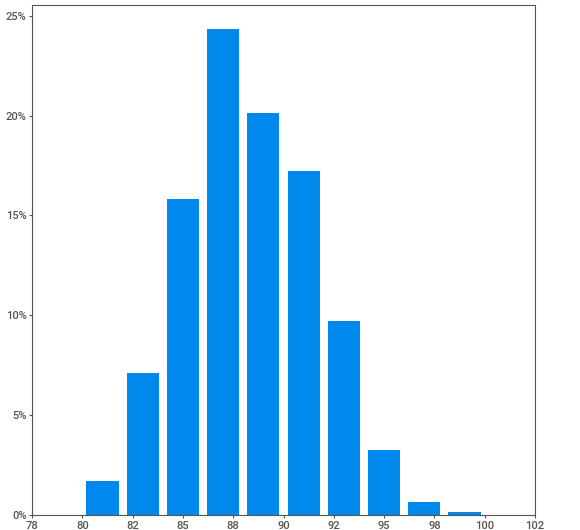
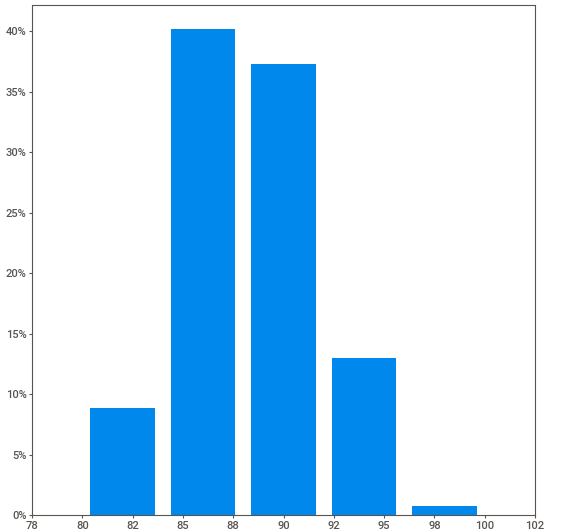
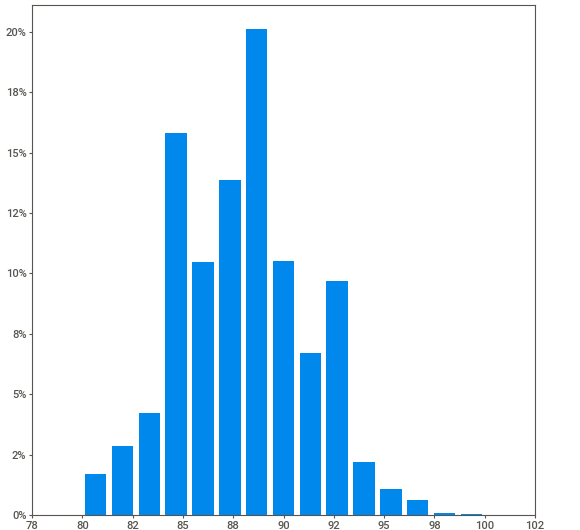
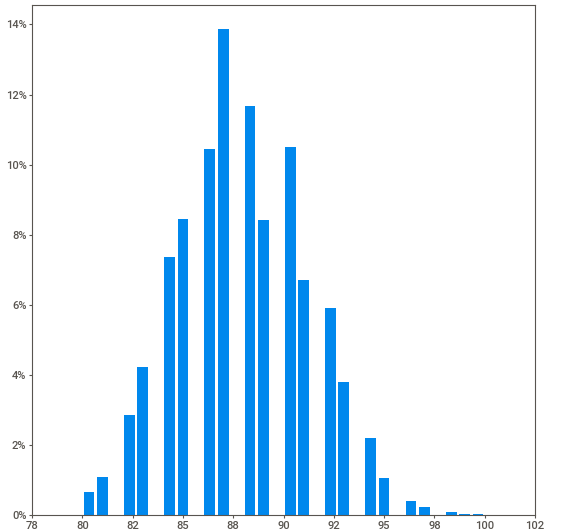
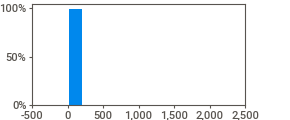
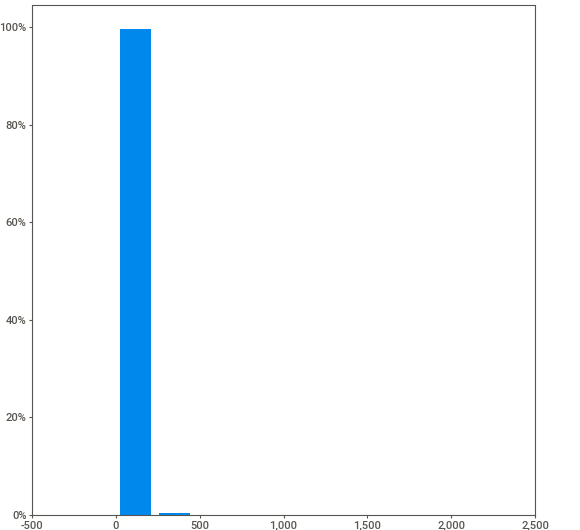
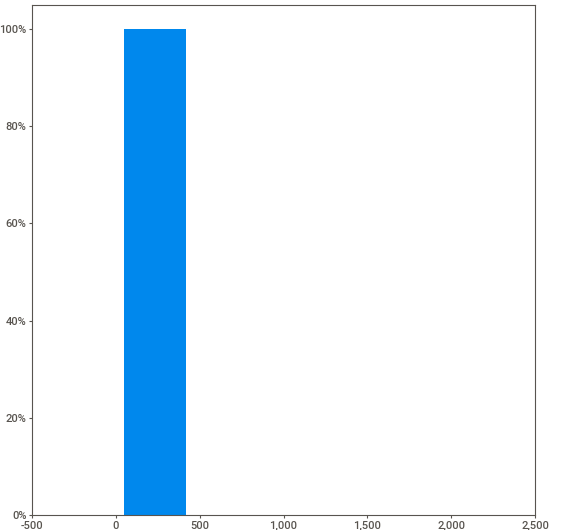
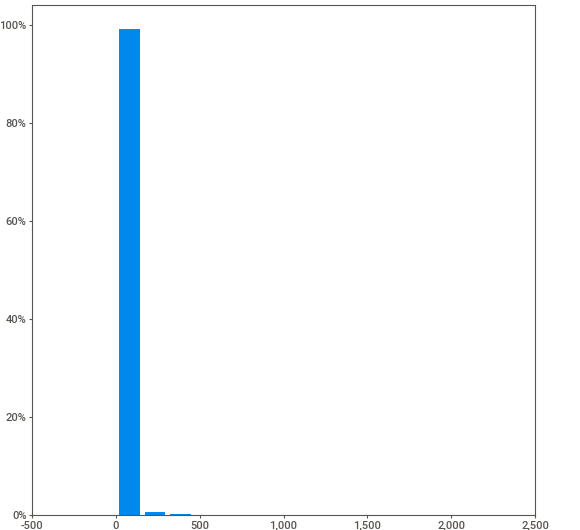
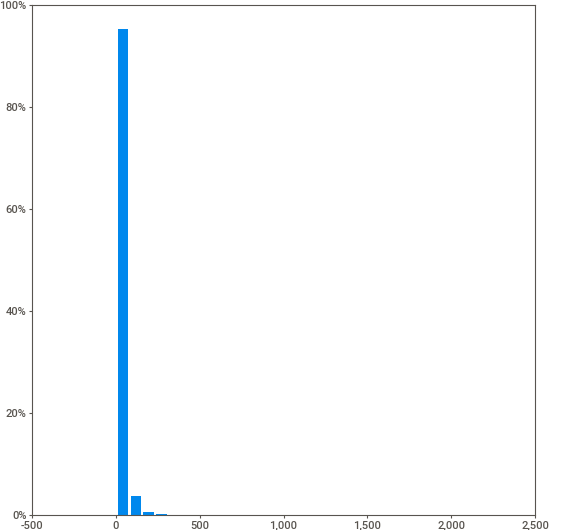
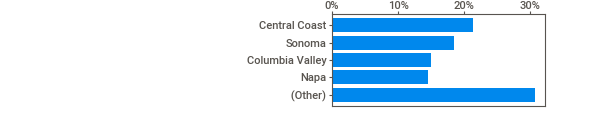
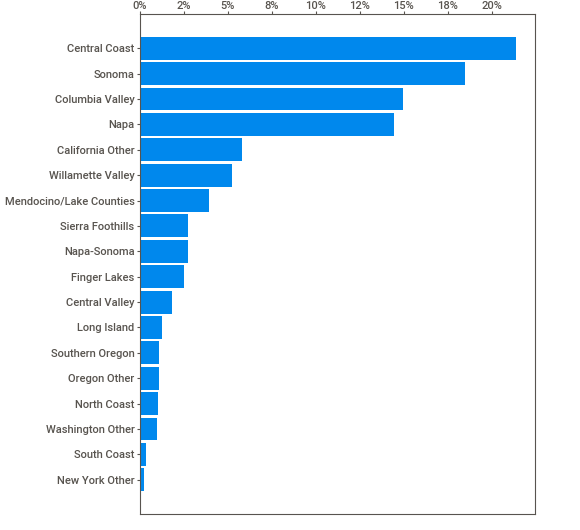
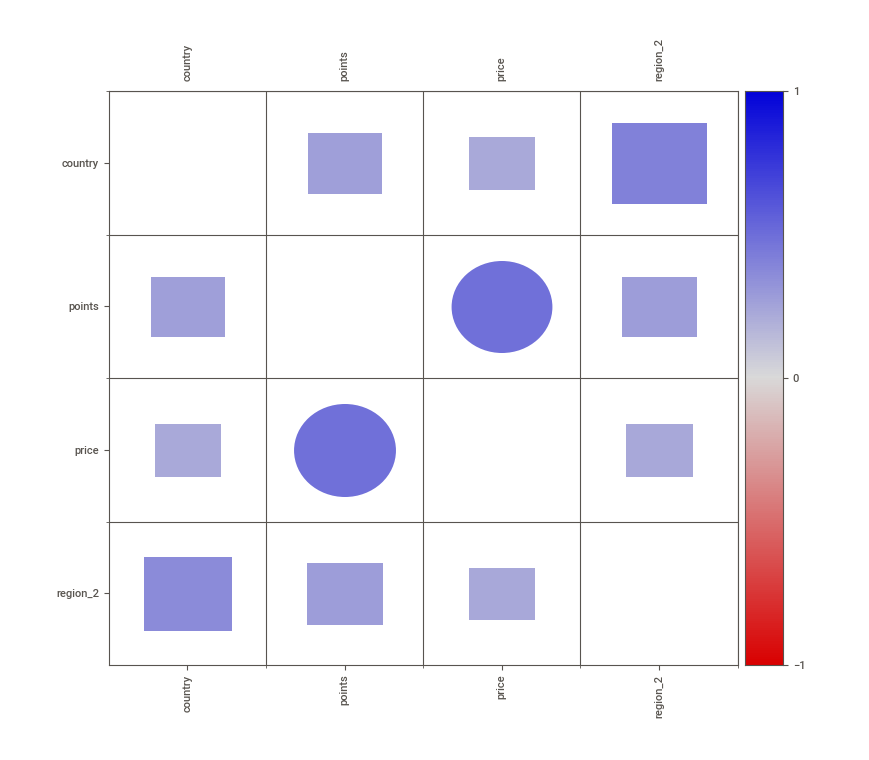
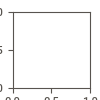

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['description', 'price', 'designation', 'region_1', 'region_2', 'winery'])
y = df[['price']]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   country   137235 non-null  object
 1   points    137235 non-null  int64 
 2   province  137235 non-null  object
 3   variety   137235 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.2+ MB


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [7]:
x_train.shape, x_test.shape

((109788, 4), (27447, 4))

In [8]:
model = catboost.CatBoostRegressor(
    cat_features=['country', 'province', 'variety'], 
    loss_function="RMSEWithUncertainty",
)

In [9]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 4.8314372	test: 4.8292271	best: 4.8292271 (0)	total: 67.7ms	remaining: 1m 7s
1:	learn: 4.7997077	test: 4.7939343	best: 4.7939343 (1)	total: 87ms	remaining: 43.4s
2:	learn: 4.7757775	test: 4.7673830	best: 4.7673830 (2)	total: 103ms	remaining: 34.3s
3:	learn: 4.7574390	test: 4.7478932	best: 4.7478932 (3)	total: 116ms	remaining: 28.8s
4:	learn: 4.7397537	test: 4.7287857	best: 4.7287857 (4)	total: 130ms	remaining: 25.9s
5:	learn: 4.7234768	test: 4.7114356	best: 4.7114356 (5)	total: 150ms	remaining: 24.9s
6:	learn: 4.7081416	test: 4.6953868	best: 4.6953868 (6)	total: 164ms	remaining: 23.3s
7:	learn: 4.6938546	test: 4.6804105	best: 4.6804105 (7)	total: 175ms	remaining: 21.6s
8:	learn: 4.6806698	test: 4.6664630	best: 4.6664630 (8)	total: 189ms	remaining: 20.8s
9:	learn: 4.6679297	test: 4.6531908	best: 4.6531908 (9)	total: 201ms	remaining: 19.9s
10:	learn: 4.6556153	test: 4.6400570	best: 4.6400570 (10)	total: 215ms	remaining: 19.3s
11:	learn: 4.6443701	test: 4.6279899	best: 4.6279899

96:	learn: 4.2229908	test: 4.1792821	best: 4.1792821 (96)	total: 1.35s	remaining: 12.6s
97:	learn: 4.2203520	test: 4.1769930	best: 4.1769930 (97)	total: 1.36s	remaining: 12.6s
98:	learn: 4.2181648	test: 4.1743142	best: 4.1743142 (98)	total: 1.38s	remaining: 12.5s
99:	learn: 4.2141121	test: 4.1705864	best: 4.1705864 (99)	total: 1.39s	remaining: 12.5s
100:	learn: 4.2113367	test: 4.1673482	best: 4.1673482 (100)	total: 1.4s	remaining: 12.5s
101:	learn: 4.2098854	test: 4.1657600	best: 4.1657600 (101)	total: 1.42s	remaining: 12.5s
102:	learn: 4.2087145	test: 4.1643117	best: 4.1643117 (102)	total: 1.44s	remaining: 12.5s
103:	learn: 4.2067323	test: 4.1620148	best: 4.1620148 (103)	total: 1.45s	remaining: 12.5s
104:	learn: 4.2045959	test: 4.1605334	best: 4.1605334 (104)	total: 1.46s	remaining: 12.5s
105:	learn: 4.2007962	test: 4.1577928	best: 4.1577928 (105)	total: 1.47s	remaining: 12.4s
106:	learn: 4.1977028	test: 4.1546151	best: 4.1546151 (106)	total: 1.48s	remaining: 12.4s
107:	learn: 4.19578

196:	learn: 4.1099201	test: 4.0702289	best: 4.0702289 (196)	total: 2.53s	remaining: 10.3s
197:	learn: 4.1097542	test: 4.0701756	best: 4.0701756 (197)	total: 2.54s	remaining: 10.3s
198:	learn: 4.1084603	test: 4.0693108	best: 4.0693108 (198)	total: 2.55s	remaining: 10.3s
199:	learn: 4.1083215	test: 4.0689461	best: 4.0689461 (199)	total: 2.56s	remaining: 10.2s
200:	learn: 4.1075320	test: 4.0681997	best: 4.0681997 (200)	total: 2.57s	remaining: 10.2s
201:	learn: 4.1069022	test: 4.0674276	best: 4.0674276 (201)	total: 2.58s	remaining: 10.2s
202:	learn: 4.1054708	test: 4.0662772	best: 4.0662772 (202)	total: 2.59s	remaining: 10.2s
203:	learn: 4.1050523	test: 4.0660528	best: 4.0660528 (203)	total: 2.6s	remaining: 10.2s
204:	learn: 4.1049475	test: 4.0660776	best: 4.0660528 (203)	total: 2.61s	remaining: 10.1s
205:	learn: 4.1045022	test: 4.0655562	best: 4.0655562 (205)	total: 2.62s	remaining: 10.1s
206:	learn: 4.1043787	test: 4.0655176	best: 4.0655176 (206)	total: 2.63s	remaining: 10.1s
207:	learn:

294:	learn: 4.0674658	test: 4.0417963	best: 4.0417963 (294)	total: 3.63s	remaining: 8.67s
295:	learn: 4.0668990	test: 4.0418389	best: 4.0417963 (294)	total: 3.64s	remaining: 8.65s
296:	learn: 4.0666594	test: 4.0417585	best: 4.0417585 (296)	total: 3.65s	remaining: 8.65s
297:	learn: 4.0660630	test: 4.0418418	best: 4.0417585 (296)	total: 3.66s	remaining: 8.63s
298:	learn: 4.0658577	test: 4.0416588	best: 4.0416588 (298)	total: 3.67s	remaining: 8.62s
299:	learn: 4.0653374	test: 4.0413561	best: 4.0413561 (299)	total: 3.69s	remaining: 8.61s
300:	learn: 4.0651840	test: 4.0414599	best: 4.0413561 (299)	total: 3.7s	remaining: 8.6s
301:	learn: 4.0649493	test: 4.0414532	best: 4.0413561 (299)	total: 3.72s	remaining: 8.59s
302:	learn: 4.0644732	test: 4.0412016	best: 4.0412016 (302)	total: 3.73s	remaining: 8.57s
303:	learn: 4.0642633	test: 4.0409715	best: 4.0409715 (303)	total: 3.74s	remaining: 8.57s
304:	learn: 4.0640723	test: 4.0408871	best: 4.0408871 (304)	total: 3.76s	remaining: 8.56s
305:	learn: 

394:	learn: 4.0481829	test: 4.0328747	best: 4.0328747 (394)	total: 4.85s	remaining: 7.43s
395:	learn: 4.0481524	test: 4.0328684	best: 4.0328684 (395)	total: 4.86s	remaining: 7.42s
396:	learn: 4.0479176	test: 4.0327811	best: 4.0327811 (396)	total: 4.87s	remaining: 7.4s
397:	learn: 4.0476794	test: 4.0326287	best: 4.0326287 (397)	total: 4.89s	remaining: 7.39s
398:	learn: 4.0475337	test: 4.0326185	best: 4.0326185 (398)	total: 4.9s	remaining: 7.38s
399:	learn: 4.0473506	test: 4.0324611	best: 4.0324611 (399)	total: 4.91s	remaining: 7.37s
400:	learn: 4.0470086	test: 4.0321696	best: 4.0321696 (400)	total: 4.92s	remaining: 7.36s
401:	learn: 4.0469760	test: 4.0322313	best: 4.0321696 (400)	total: 4.94s	remaining: 7.34s
402:	learn: 4.0466049	test: 4.0321103	best: 4.0321103 (402)	total: 4.95s	remaining: 7.33s
403:	learn: 4.0465742	test: 4.0321247	best: 4.0321103 (402)	total: 4.96s	remaining: 7.32s
404:	learn: 4.0465532	test: 4.0320935	best: 4.0320935 (404)	total: 4.97s	remaining: 7.31s
405:	learn: 

491:	learn: 4.0328785	test: 4.0260942	best: 4.0260942 (491)	total: 6.08s	remaining: 6.27s
492:	learn: 4.0327742	test: 4.0260074	best: 4.0260074 (492)	total: 6.09s	remaining: 6.26s
493:	learn: 4.0327083	test: 4.0259617	best: 4.0259617 (493)	total: 6.1s	remaining: 6.25s
494:	learn: 4.0327009	test: 4.0259798	best: 4.0259617 (493)	total: 6.11s	remaining: 6.23s
495:	learn: 4.0323277	test: 4.0258671	best: 4.0258671 (495)	total: 6.12s	remaining: 6.22s
496:	learn: 4.0322923	test: 4.0259387	best: 4.0258671 (495)	total: 6.13s	remaining: 6.21s
497:	learn: 4.0322829	test: 4.0259558	best: 4.0258671 (495)	total: 6.15s	remaining: 6.2s
498:	learn: 4.0320963	test: 4.0258284	best: 4.0258284 (498)	total: 6.16s	remaining: 6.19s
499:	learn: 4.0319937	test: 4.0258515	best: 4.0258284 (498)	total: 6.17s	remaining: 6.17s
500:	learn: 4.0316658	test: 4.0257004	best: 4.0257004 (500)	total: 6.19s	remaining: 6.16s
501:	learn: 4.0316466	test: 4.0257074	best: 4.0257004 (500)	total: 6.2s	remaining: 6.15s
502:	learn: 4

592:	learn: 4.0222412	test: 4.0219200	best: 4.0219200 (592)	total: 7.32s	remaining: 5.02s
593:	learn: 4.0221828	test: 4.0219290	best: 4.0219200 (592)	total: 7.33s	remaining: 5.01s
594:	learn: 4.0221153	test: 4.0218323	best: 4.0218323 (594)	total: 7.34s	remaining: 5s
595:	learn: 4.0215978	test: 4.0216502	best: 4.0216502 (595)	total: 7.35s	remaining: 4.99s
596:	learn: 4.0214040	test: 4.0214599	best: 4.0214599 (596)	total: 7.37s	remaining: 4.97s
597:	learn: 4.0213314	test: 4.0213915	best: 4.0213915 (597)	total: 7.38s	remaining: 4.96s
598:	learn: 4.0211646	test: 4.0214866	best: 4.0213915 (597)	total: 7.4s	remaining: 4.95s
599:	learn: 4.0211585	test: 4.0214891	best: 4.0213915 (597)	total: 7.41s	remaining: 4.94s
600:	learn: 4.0211233	test: 4.0214445	best: 4.0213915 (597)	total: 7.42s	remaining: 4.92s
601:	learn: 4.0209241	test: 4.0213603	best: 4.0213603 (601)	total: 7.43s	remaining: 4.91s
602:	learn: 4.0208858	test: 4.0213093	best: 4.0213093 (602)	total: 7.44s	remaining: 4.9s
603:	learn: 4.0

688:	learn: 4.0153290	test: 4.0194934	best: 4.0194242 (649)	total: 8.45s	remaining: 3.81s
689:	learn: 4.0150723	test: 4.0193944	best: 4.0193944 (689)	total: 8.46s	remaining: 3.8s
690:	learn: 4.0150276	test: 4.0193693	best: 4.0193693 (690)	total: 8.47s	remaining: 3.79s
691:	learn: 4.0149955	test: 4.0193752	best: 4.0193693 (690)	total: 8.48s	remaining: 3.77s
692:	learn: 4.0148259	test: 4.0193770	best: 4.0193693 (690)	total: 8.49s	remaining: 3.76s
693:	learn: 4.0146207	test: 4.0191636	best: 4.0191636 (693)	total: 8.5s	remaining: 3.75s
694:	learn: 4.0145993	test: 4.0191385	best: 4.0191385 (694)	total: 8.51s	remaining: 3.73s
695:	learn: 4.0145097	test: 4.0192839	best: 4.0191385 (694)	total: 8.52s	remaining: 3.72s
696:	learn: 4.0144571	test: 4.0192056	best: 4.0191385 (694)	total: 8.53s	remaining: 3.71s
697:	learn: 4.0144428	test: 4.0192297	best: 4.0191385 (694)	total: 8.54s	remaining: 3.7s
698:	learn: 4.0143920	test: 4.0191392	best: 4.0191385 (694)	total: 8.55s	remaining: 3.68s
699:	learn: 4

782:	learn: 4.0078620	test: 4.0190761	best: 4.0181864 (732)	total: 9.57s	remaining: 2.65s
783:	learn: 4.0078352	test: 4.0190759	best: 4.0181864 (732)	total: 9.58s	remaining: 2.64s
784:	learn: 4.0075275	test: 4.0192806	best: 4.0181864 (732)	total: 9.6s	remaining: 2.63s
785:	learn: 4.0075054	test: 4.0194487	best: 4.0181864 (732)	total: 9.61s	remaining: 2.62s
786:	learn: 4.0074310	test: 4.0194658	best: 4.0181864 (732)	total: 9.62s	remaining: 2.6s
787:	learn: 4.0073920	test: 4.0193416	best: 4.0181864 (732)	total: 9.63s	remaining: 2.59s
788:	learn: 4.0073801	test: 4.0193007	best: 4.0181864 (732)	total: 9.64s	remaining: 2.58s
789:	learn: 4.0073424	test: 4.0192596	best: 4.0181864 (732)	total: 9.65s	remaining: 2.56s
790:	learn: 4.0072564	test: 4.0192368	best: 4.0181864 (732)	total: 9.66s	remaining: 2.55s
791:	learn: 4.0071462	test: 4.0192083	best: 4.0181864 (732)	total: 9.68s	remaining: 2.54s
792:	learn: 4.0070949	test: 4.0190285	best: 4.0181864 (732)	total: 9.69s	remaining: 2.53s
793:	learn: 

878:	learn: 4.0017193	test: 4.0218376	best: 4.0181864 (732)	total: 10.7s	remaining: 1.47s
879:	learn: 4.0017070	test: 4.0218483	best: 4.0181864 (732)	total: 10.7s	remaining: 1.46s
880:	learn: 4.0016890	test: 4.0219619	best: 4.0181864 (732)	total: 10.7s	remaining: 1.45s
881:	learn: 4.0016862	test: 4.0220024	best: 4.0181864 (732)	total: 10.7s	remaining: 1.44s
882:	learn: 4.0016751	test: 4.0221682	best: 4.0181864 (732)	total: 10.8s	remaining: 1.42s
883:	learn: 4.0016183	test: 4.0222006	best: 4.0181864 (732)	total: 10.8s	remaining: 1.41s
884:	learn: 4.0015679	test: 4.0222427	best: 4.0181864 (732)	total: 10.8s	remaining: 1.4s
885:	learn: 4.0014183	test: 4.0221977	best: 4.0181864 (732)	total: 10.8s	remaining: 1.39s
886:	learn: 4.0014098	test: 4.0222796	best: 4.0181864 (732)	total: 10.8s	remaining: 1.38s
887:	learn: 4.0013788	test: 4.0222946	best: 4.0181864 (732)	total: 10.8s	remaining: 1.36s
888:	learn: 4.0012842	test: 4.0222760	best: 4.0181864 (732)	total: 10.8s	remaining: 1.35s
889:	learn:

971:	learn: 3.9974538	test: 4.0244342	best: 4.0181864 (732)	total: 11.8s	remaining: 341ms
972:	learn: 3.9974323	test: 4.0243977	best: 4.0181864 (732)	total: 11.8s	remaining: 329ms
973:	learn: 3.9974073	test: 4.0243798	best: 4.0181864 (732)	total: 11.9s	remaining: 317ms
974:	learn: 3.9973019	test: 4.0244291	best: 4.0181864 (732)	total: 11.9s	remaining: 304ms
975:	learn: 3.9972998	test: 4.0244629	best: 4.0181864 (732)	total: 11.9s	remaining: 292ms
976:	learn: 3.9972561	test: 4.0244482	best: 4.0181864 (732)	total: 11.9s	remaining: 280ms
977:	learn: 3.9971716	test: 4.0244480	best: 4.0181864 (732)	total: 11.9s	remaining: 268ms
978:	learn: 3.9971662	test: 4.0245140	best: 4.0181864 (732)	total: 11.9s	remaining: 256ms
979:	learn: 3.9971052	test: 4.0243749	best: 4.0181864 (732)	total: 11.9s	remaining: 244ms
980:	learn: 3.9970937	test: 4.0245216	best: 4.0181864 (732)	total: 12s	remaining: 232ms
981:	learn: 3.9970401	test: 4.0244117	best: 4.0181864 (732)	total: 12s	remaining: 219ms
982:	learn: 3.

In [10]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [11]:
calculate_nll_catboost(model, x_train, y_train)

4.003470702802556

In [12]:
calculate_nll_catboost(model, x_test, y_test)

4.029862609470571

In [13]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 2, 3], 
    loss_function="RMSEWithUncertainty",
    depth=3,
    num_trees=100,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(100, 100, 50), context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [14]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=10, batch_size=2048, verbose=True)

0:	learn: 4.8545150	total: 7.99ms	remaining: 791ms
1:	learn: 4.8203797	total: 13.1ms	remaining: 642ms
2:	learn: 4.7979336	total: 18ms	remaining: 583ms
3:	learn: 4.7736525	total: 25.3ms	remaining: 608ms
4:	learn: 4.7526983	total: 31.3ms	remaining: 595ms
5:	learn: 4.7383686	total: 36.5ms	remaining: 572ms
6:	learn: 4.7233227	total: 41.5ms	remaining: 551ms
7:	learn: 4.7080362	total: 46.8ms	remaining: 538ms
8:	learn: 4.6954729	total: 51.9ms	remaining: 525ms
9:	learn: 4.6834125	total: 57.9ms	remaining: 521ms
10:	learn: 4.6723955	total: 62.9ms	remaining: 509ms
11:	learn: 4.6619876	total: 67.9ms	remaining: 498ms
12:	learn: 4.6496374	total: 72.8ms	remaining: 487ms
13:	learn: 4.6382801	total: 77.7ms	remaining: 477ms
14:	learn: 4.6275176	total: 83ms	remaining: 470ms
15:	learn: 4.6169598	total: 88ms	remaining: 462ms
16:	learn: 4.6069891	total: 93ms	remaining: 454ms
17:	learn: 4.5998598	total: 98ms	remaining: 446ms
18:	learn: 4.5909147	total: 103ms	remaining: 439ms
19:	learn: 4.5823819	total: 108ms

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f6a102d82b0>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f6a102d80f0>)

In [15]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

3.8480942

In [16]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

3.811703

In [17]:
data = x_test.iloc[:10, :]

In [18]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

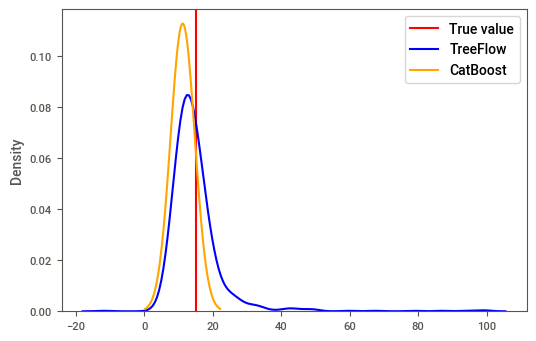

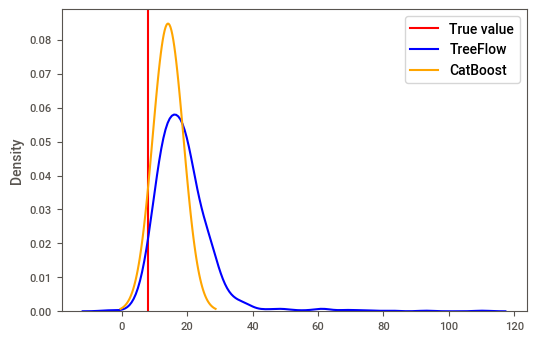

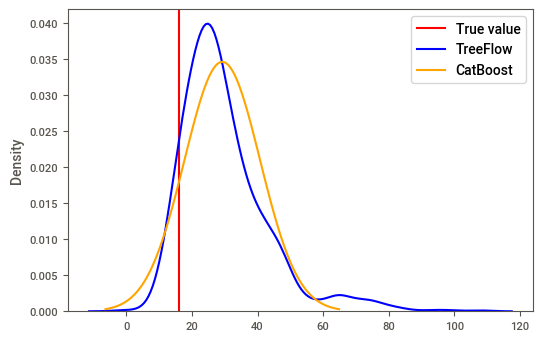

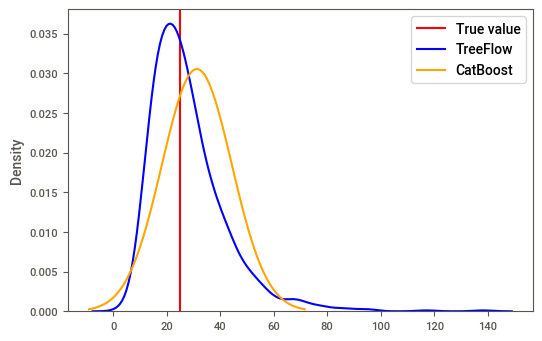

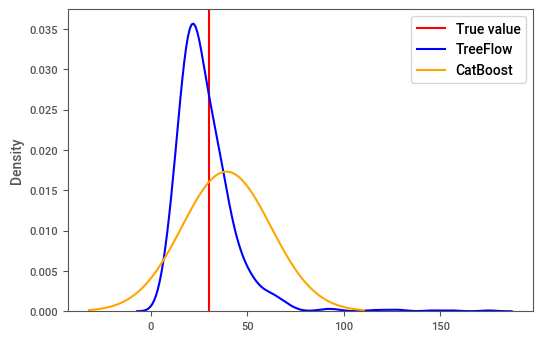

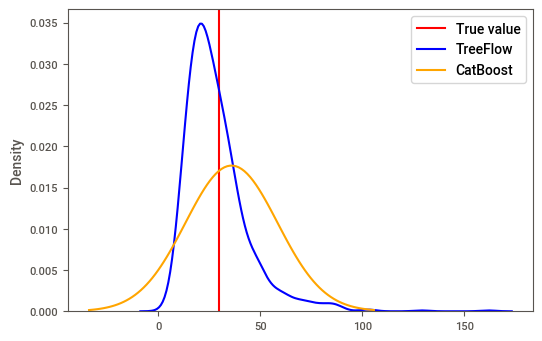

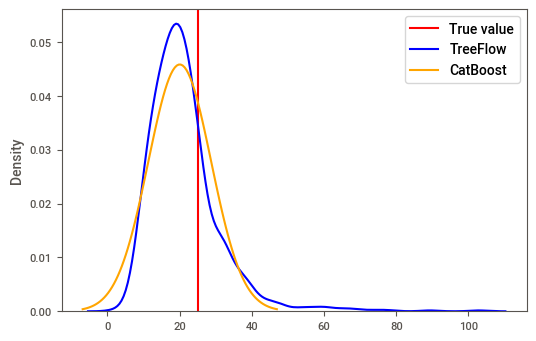

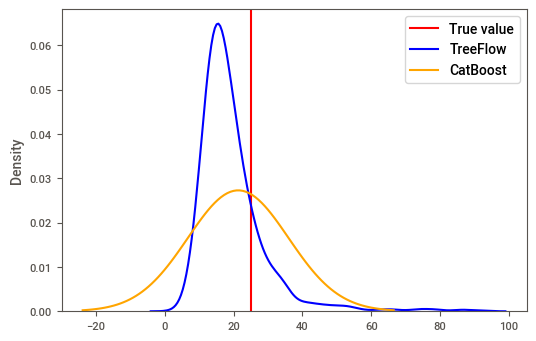

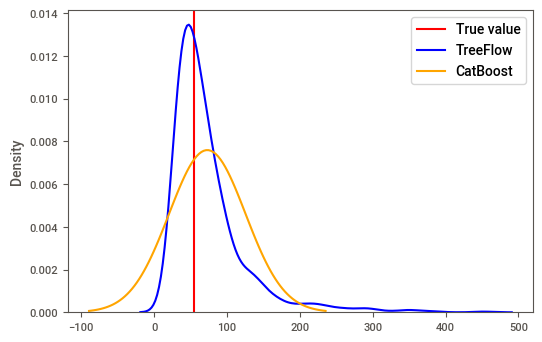

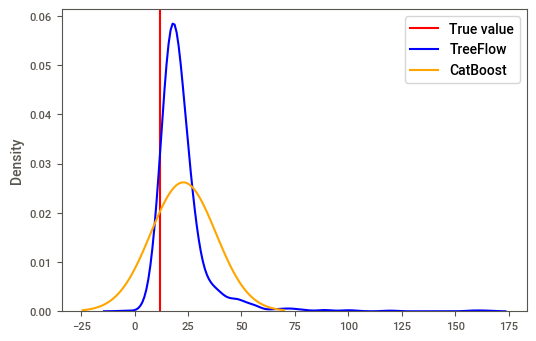

In [19]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()

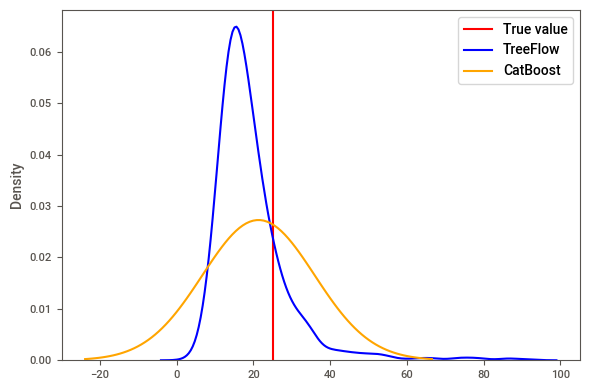

In [21]:
i = 7

plt.axvline(x=y_test.values[i, :], color='r', label='True value')

sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

x = np.linspace(
    stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    100
)
plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

plt.legend()
plt.tight_layout()
plt.savefig('wine_reviews.pdf')